In [18]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [5]:
#############Exploratory Data Analysis##########
turnover_dataFrame = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

#---------Check if any of the columns contains missing values---###
null_columns_names = []
non_null_columns_names = []
for col in turnover_dataFrame.columns:
    if (turnover_dataFrame[col].isnull().any()==True):
        null_columns_names.append(col)
    else:
        non_null_columns_names.append(col)
if len(null_columns_names) != 0:
    print(null_columns_names)
else:
    print("No columns with Missing values")



No columns with Missing values


In [6]:
# print("list clean column: ",non_null_columns_names)

#-----------Getting the count of features variables-------------------#
feature_list = []
for i in turnover_dataFrame.columns:
    feature_list.append(i)
#---------Separating columns with continous and categorical variables--------#


list_of_categorical_variables = []
list_of_continous_variables = []
for col in turnover_dataFrame.columns:
    if ((turnover_dataFrame[col].dtype) == object ):
        list_of_categorical_variables.append(col)
    else:
        list_of_continous_variables.append(col)
# print("categorical variables:",list_of_categorical_variables)
# print("continous variable:", list_of_continous_variables)


c:\Users\Bhavnish\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Bhavnish\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 80.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Bhavnish\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Bhavnish\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 80.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Bhavnish\lib\site-packages\pandas\plotting\_matpl

LinAlgError: singular matrix

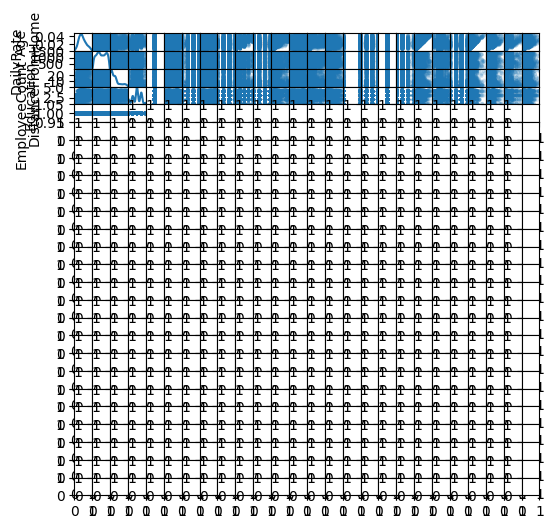

In [9]:
#----------------Data Visualisation-------------------#
pd.plotting.scatter_matrix(turnover_dataFrame, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.savefig('scatter_matrix')
plt.show()


pd.crosstab(turnover_dataFrame.Department,turnover_dataFrame.Attrition).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.savefig('department_bar_chart')


table=pd.crosstab(turnover_dataFrame.PercentSalaryHike, turnover_dataFrame.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Attrition')
plt.savefig('salary_bar_chart')


num_bins = 10
turnover_dataFrame.hist(bins=num_bins, figsize=(30,12))
plt.savefig("hr_histogram_plots")
plt.show()


In [14]:
##-----------------analyse the data-------------##

mode_dataFrame = turnover_dataFrame.groupby("Attrition").mean()
mode_dataFrame = mode_dataFrame.T
mode_dataFrame.index.name = "Factors"


department_wise_analysis = turnover_dataFrame[turnover_dataFrame["Attrition"] == 'Yes'].groupby("Department").mean()
# department_wise_analysis = department_wise_analysis.T
salary_wise_anaysis = turnover_dataFrame[turnover_dataFrame["Attrition"] == 'Yes'].groupby("PercentSalaryHike").mean()
salary_wise_anaysis = salary_wise_anaysis.T

###-----------------Moving all the dataframes different sheets of same CSV file ----------#######

Analysis_data_frame = pd.ExcelWriter('HR_Analysis.xlsx', engine='xlsxwriter')

mode_dataFrame.to_excel(Analysis_data_frame, sheet_name='mode_dataFrame')
department_wise_analysis.to_excel(Analysis_data_frame, sheet_name='department_wise_analysis')
salary_wise_anaysis.to_excel(Analysis_data_frame, sheet_name='salary_wise_anaysis')

In [15]:

##################################Feature Engineering##################################

###-------------------Encoding of categorical variables----------------###
categorical_dataframe = turnover_dataFrame[list_of_categorical_variables]
categorical_dataframe = categorical_dataframe.drop(["Attrition"], axis = 1) # we need to drop the target variable column

categorical_dataframe = pd.get_dummies(categorical_dataframe)

categorical_dataframe.to_excel(Analysis_data_frame, sheet_name='categorical_dataframe')

###--------------Creating Numerical vaue data Frame----------------##
numerical_dataframe = turnover_dataFrame[list_of_continous_variables]
numerical_dataframe.to_excel(Analysis_data_frame, sheet_name='numerical_dataframe')
Analysis_data_frame.save()
###--------------Creating Predict variable DataFrame-----------####
predictor_dataFrame = pd.concat([numerical_dataframe, categorical_dataframe], axis = 1)

###--------------Handling The Target variable -----------#####
# The target column in this data set is the "Attrition" column, that contains categorical labels:Yes and No.
# lets perform numerical encoding over this column using dictinary, and replace
# Yes's with 1's and No's with 0's

Numerical_encoding = {'Yes':1, 'No':0}

target_variable = turnover_dataFrame["Attrition"].apply(lambda x: Numerical_encoding[x])




In [19]:

################################ Modelling #######################
X = predictor_dataFrame
y = target_variable


##-----------------Dividing the data into Train and test Split-----##
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictor_dataFrame, target_variable, test_size = 0.25, random_state = 0)

##----------------Feature Scaling ---------------##
# I am commenting this part beacuse I discovered that the accuracy of the model increases if we don't
#apply feature scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

##-----------------Logistic Regression-----------------------------##
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = logistic_classifier.predict(X_test)

###---------------Testing the Accuracy of LogisticRegression---------##
####--------Using confusion_matrix------####
cm = confusion_matrix(y_test,y_pred)
sum_of_diagonal_elements = sum(np.diagonal(cm))
sum_of_all_elements_confusion_matrix = np.sum(cm)
Accuracy_score = sum_of_diagonal_elements/sum_of_all_elements_confusion_matrix
print("***LogisticRegression accuracies*****")
print("confusion_matrix score: ",Accuracy_score*100)
####---------Using Cross cross_validation--------------------####
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logistic_classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

print("cross_val_score : ",accuracies.mean()*100)

## the accuracy for LogisticRegression is as follows:
# ***LogisticRegression accuracies*****
# confusion_matrix score:  89.6739130435
# cross_val_score :  88.3855540278



C:\Users\Bhavnish\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhavnish\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

***LogisticRegression accuracies*****
confusion_matrix score:  84.23913043478261
cross_val_score :  83.57493857493859


C:\Users\Bhavnish\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhavnish\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [20]:
##-----------------Decision Tree Classifier-----------------------------##
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

###---------------Testing the Accuracy of DecisionTreeClassifier---------##
####--------Using confusion_matrix------####
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
sum_of_diagonal_elements = sum(np.diagonal(cm))
sum_of_all_elements_confusion_matrix = np.sum(cm)
Accuracy_score = sum_of_diagonal_elements/sum_of_all_elements_confusion_matrix
print("***DecisionTreeClassifier accuracies*****")
print("confusion_matrix score: ",Accuracy_score*100)

####---------Using Cross cross_validation--------------------####
accuracies = cross_val_score(estimator = decision_tree_classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

print("cross_val_score: ",accuracies.mean()*100)

### The Accuracy of the DecisionTreeClassifier##
# ***DecisionTreeClassifier accuracies*****
# confusion_matrix score:  80.4347826087
# cross_val_score:  78.4009497404



***DecisionTreeClassifier accuracies*****
confusion_matrix score:  80.43478260869566
cross_val_score:  78.76740376740378


In [21]:

##----------------RandomForestClassifier#----------------##
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)

###------------------Testing the accuracy of RandomForestClassifier----------###
####--------Using confusion_matrix------####
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
sum_of_diagonal_elements = sum(np.diagonal(cm))
sum_of_all_elements_confusion_matrix = np.sum(cm)
Accuracy_score = sum_of_diagonal_elements/sum_of_all_elements_confusion_matrix
print("***RandomForestClassifier accuracies*****")
print("confusion_matrix score: ",Accuracy_score*100)

####---------Using Cross cross_validation--------------------####
accuracies = cross_val_score(estimator = decision_tree_classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()
print("cross_val_score: ",accuracies.mean()*100)

### The accuracy of RandomForestClassifier###
# ***RandomForestClassifier accuracies*****
# confusion_matrix score:  85.597826087
# cross_val_score:  78.4009497404


***RandomForestClassifier accuracies*****
confusion_matrix score:  85.59782608695652
cross_val_score:  78.76740376740378


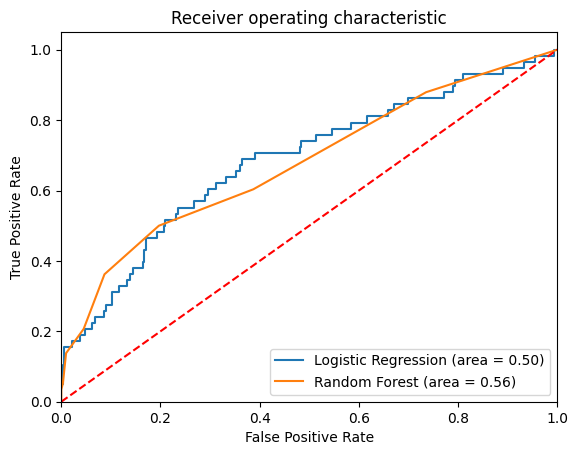

[0.68845138 0.30438233]
RandomForestClassifier Importance
[  44 1488    1    5    1   68    2   75    3    2    1 5454 4009    5
   21    4    3   80    1    9    2    2    4    3    1    3    0    0
    1    0    0    1    0    0    1    0    0    0    1    0    0    0
    0    0    0    0    0    1    0    1    0    0    1    0    1]-0.00%
[   27  1240     2     4     1    54     4    33     3     1     1  2341
 19715     1    13     3     4    80     1     1     6     3     1     0
     0     0     0     0     1     0     1     0     0     1     0     0
     0     0     1     0     0     0     1     0     0     0     0     0
     0     1     0     0     1     1     0]-0.00%
[   27   591     2     1     1     7     1    40     3     1     2  3468
 16632     9    12     3     4    80     1     6     3     3     2     2
     2     2     0     0     1     0     1     0     0     0     0     1
     0     0     0     1     0     0     1     0     0     0     0     0
     0     0     1    

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [22]:
#---------------Ploting the ROC curves-------##
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_classifier.predict_proba(X_test)[:,1])

# decision_tree_classifier = roc_auc_score(y_test, decision_tree_classifier.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, decision_tree_classifier.predict_proba(X_test)[:,1])


rf_roc_auc = roc_auc_score(y_test, random_forest_classifier.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, random_forest_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()


###------Applying dimesionality Feature Selection/ Dimensionality reduction technique - Principal Component Analysis
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

###----------Feature Importance for Random Forest Model------###

feature_labels = np.array(predictor_dataFrame)
importance = random_forest_classifier.feature_importances_
feature_indexes_by_importance = importance.argsort()
print("RandomForestClassifier Importance")
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

###----------Feature Importance for Logistic------###
feature_labels = np.array([predictor_dataFrame])
importance = logistic_classifier.feature_importances_
feature_indexes_by_importance = importance.argsort()
print("LogisticRegression Importance")
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))